# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Chi-Square Distribution

The W3 description is woefully inadequate.

See the [Wikipedia article here](https://en.wikipedia.org/wiki/Chi-squared_distribution).

The distribution is of the sum of the squares of $k$ independent standard normal random variables where $k$ is the degrees of freedom. It is a special case of the gamma distribution.

It is also known as the 'central chi-squared distribution', which is a special case of the more general 'noncentral chi-squared distribution'.

Friedman's analysis of variance uses this distribution to calculate the F-statistic, which is a ratio of two chi-square variables.

Furthermore, it is used in the definition of the t-distribution (used in t-tests).

The chi-square distribution, with one degree of freedom, is the same as the square of the normal-distribution.

In [10]:
import numpy as np
from configurations import printer

dfs_to_cycle_through = [*range(1, 11)]
for df in dfs_to_cycle_through:
    my_array = np.random.chisquare(df=df, size=10)
    printer(
        'These are 10 values from a chisquare distribution with %s df:\n%s\n'
        'they have a mean of %s\n',
        df,
        my_array,
        np.round(np.mean(my_array), 1)
    )

These are 10 values from a chisquare distribution with 1 df:
[1.70178702e+00 3.41674296e-01 1.96074701e-01 1.59426993e+00
 3.78526931e+00 2.72175711e-01 1.08700656e-04 4.84770226e-01
 2.87584719e-01 1.24400042e+00]
they have a mean of 1.0

These are 10 values from a chisquare distribution with 2 df:
[0.82081273 2.2659848  3.60894465 1.13934487 0.55308662 1.45686859
 0.23692925 4.14254972 0.54131611 1.98389836]
they have a mean of 1.7

These are 10 values from a chisquare distribution with 3 df:
[3.46238431 2.74733614 0.67770688 2.16084324 2.94033755 5.50671446
 8.67514913 0.57461219 6.69147894 0.58891973]
they have a mean of 3.4

These are 10 values from a chisquare distribution with 4 df:
[ 0.89291942  8.19324117  4.78928635  4.21856114  2.03602703 14.31696277
  3.02336803  2.78208576  0.63604072  2.11260706]
they have a mean of 4.3

These are 10 values from a chisquare distribution with 5 df:
[ 4.14834998  4.55342599  5.10427446  3.01356423  5.66389714 10.50631132
  5.45563148  1.276

### Visualization of the Chi-square distribution


2023-08-26 17:40:53 
	Logger: numpy-tutorial Module: 2463262526 Function: <module> File: 2463262526.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 17:40:53 
	Logger: numpy-tutorial Module: 2463262526 Function: <module> File: 2463262526.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



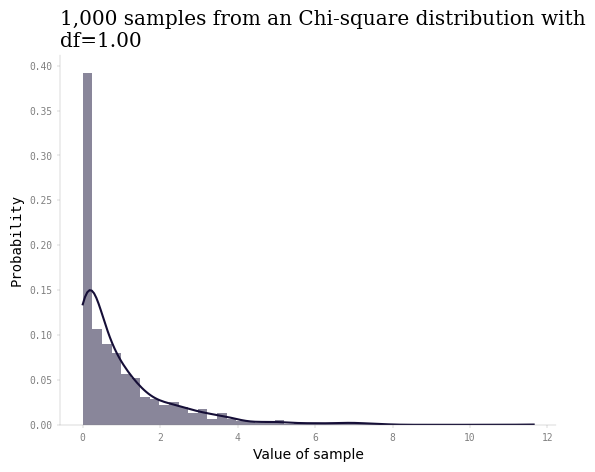

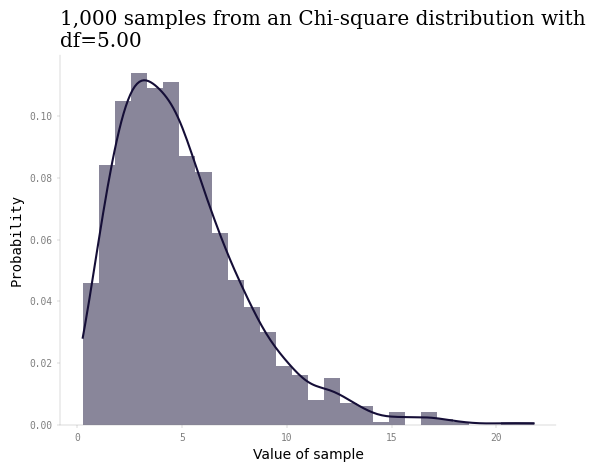

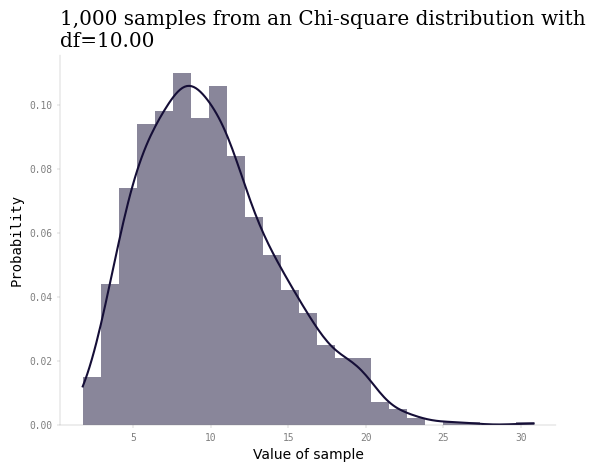

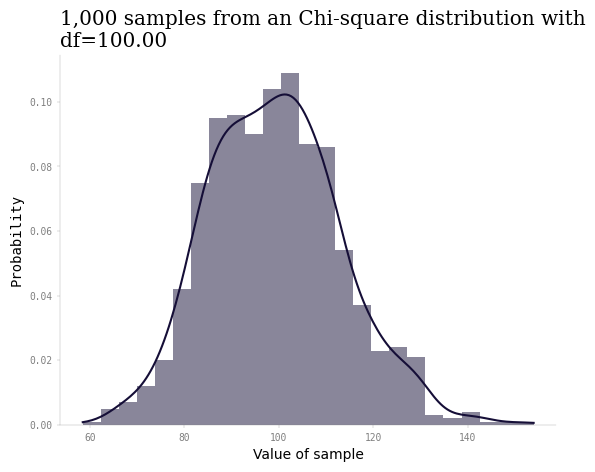

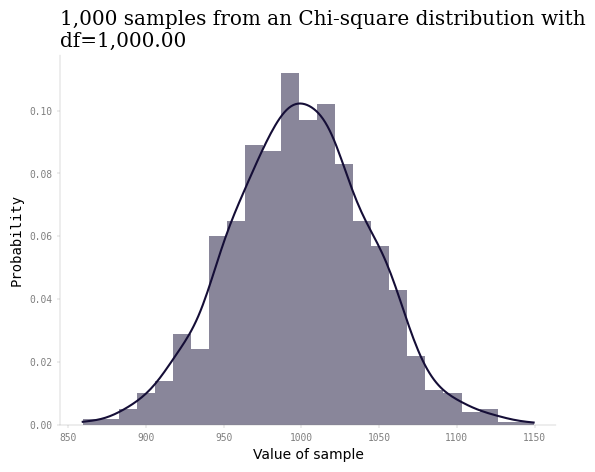

In [14]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_chisquare(
    df: int = 1,
    size: int = 1_000,
    bw_adjust: float = 1
    ) -> None:

    my_chisquare = np.random.chisquare(df=df, size=size)
    
    sns.histplot( # type: ignore
        my_chisquare,
        ax=plt.subplots()[1], # type: ignore
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None'
        )
    
    plt.title( # type: ignore
        label=f'{size:,} samples from an Chi-square distribution with\n'
        f'df={df:,}',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
dfs_to_cycle_through = [1, 5, 10, 100, 1000]

for df in dfs_to_cycle_through:
    plot_chisquare(df=df)

If you take many samples from a **single** normal distribution, standardize them (subtract the mean, then divide by the std deviation) then square them, then take the sum, you will get a chi-square distribution where df=1.

[Helpful link](https://onlinestatbook.com/2/chi_square/distribution.html#:~:text=Chi%20Square%20Distribution&text=A%20standard%20normal%20deviate%20is,standard%20normal%20deviates%20being%20summed.)


2023-08-26 18:27:06 
	Logger: numpy-tutorial Module: 4179202469 Function: <module> File: 4179202469.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 18:27:06 
	Logger: numpy-tutorial Module: 4179202469 Function: <module> File: 4179202469.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



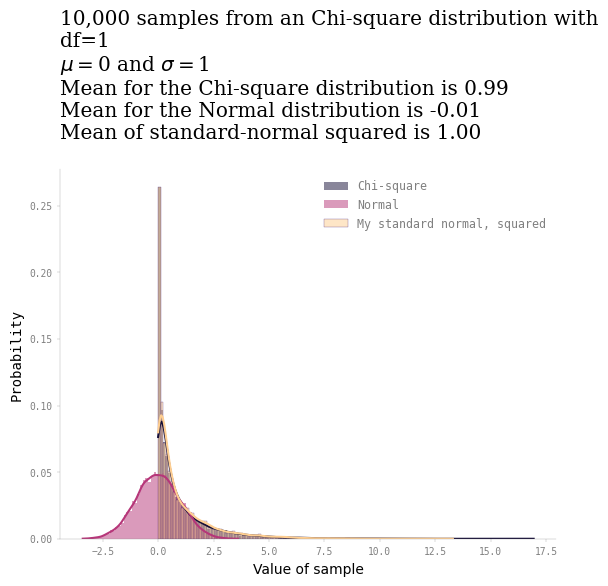

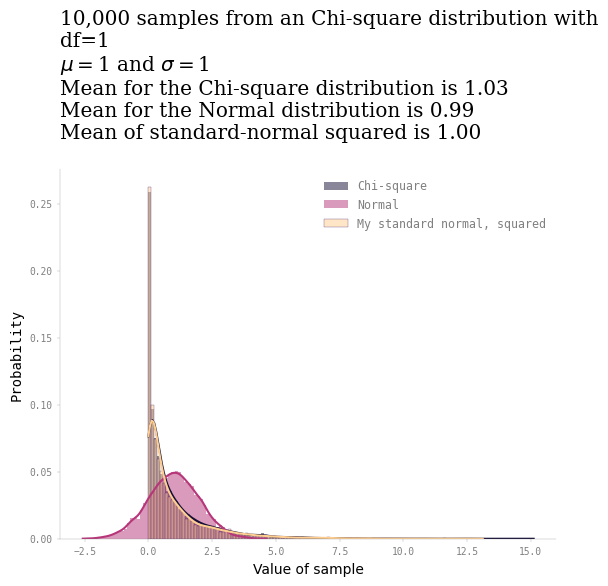

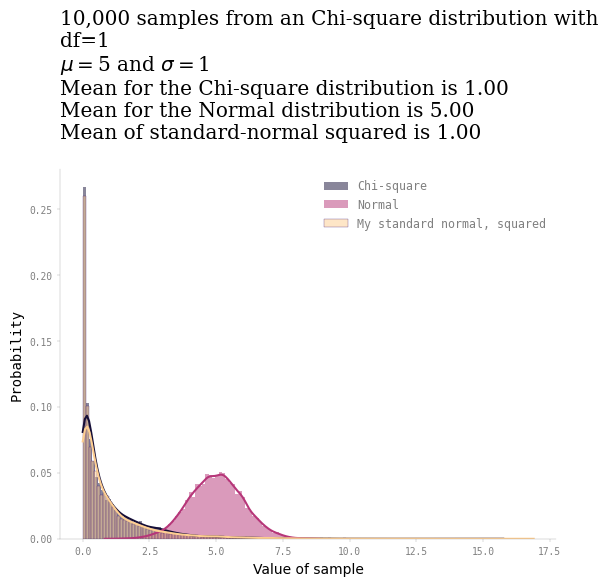

In [32]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )


def plot_chisquare(
    df: int = 1,
    size: int = 1_000,
    loc: float = 0,
    scale: float = 1,
    bw_adjust: float = 1
    ) -> None:

    my_chisquare = np.random.chisquare(df=df, size=size)
    my_normal = np.random.normal(loc=loc, scale=scale, size=size)
    my_normal_mean = np.mean(my_normal)
    my_normal_std_dev = np.std(my_normal)
    my_standard_normal = (my_normal - my_normal_mean) / my_normal_std_dev
    my_standard_normal_squared = np.square(my_standard_normal)
    
    ax=plt.subplots()[1] # type: ignore

    sns.histplot( # type: ignore
        my_chisquare,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        label='Chi-square',
        color=choose_my_color(0)
        )
    
    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        label='Normal',
        color=choose_my_color(4)
        )

    sns.histplot( # type: ignore
        my_standard_normal_squared,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor=choose_my_color(~8),
        label='My standard normal, squared',
        color=choose_my_color(8)
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from an Chi-square distribution with\n'
        f'df={df:,}\n'
        fr'$\mu=${loc} and $\sigma=${scale}'
        '\n'
        f'Mean for the Chi-square distribution is {np.mean(my_chisquare):.2f}\n'
        f'Mean for the Normal distribution is {np.mean(my_normal):.2f}\n'
        'Mean of standard-normal squared is '
        f'{np.mean(my_standard_normal_squared):.2f}\n',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
locs_to_cycle_through = [0, 1, 5]

for loc in locs_to_cycle_through:
    plot_chisquare(loc=loc, size=10_000)

If you take many samples from a **two** normal distributions, standardize them (subtract the mean, then divide by the std deviation) then square them, then take the sum, you will get a chi-square distribution where df=2.


2023-08-26 19:15:25 
	Logger: numpy-tutorial Module: 3172619492 Function: <module> File: 3172619492.py Line: 9
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 19:15:25 
	Logger: numpy-tutorial Module: 3172619492 Function: <module> File: 3172619492.py Line: 14
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



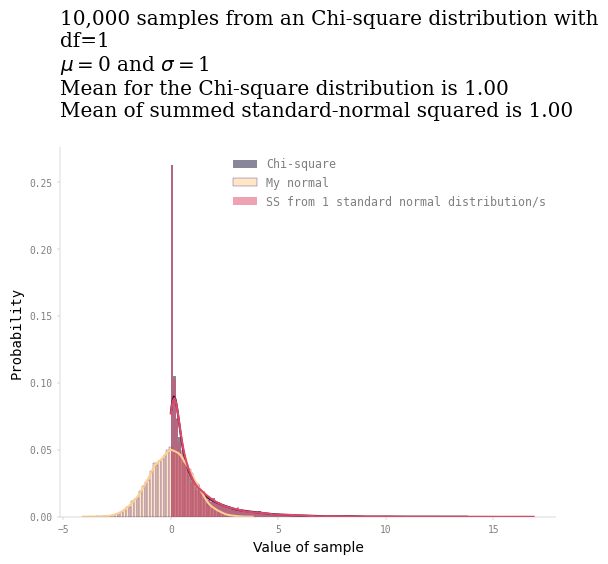

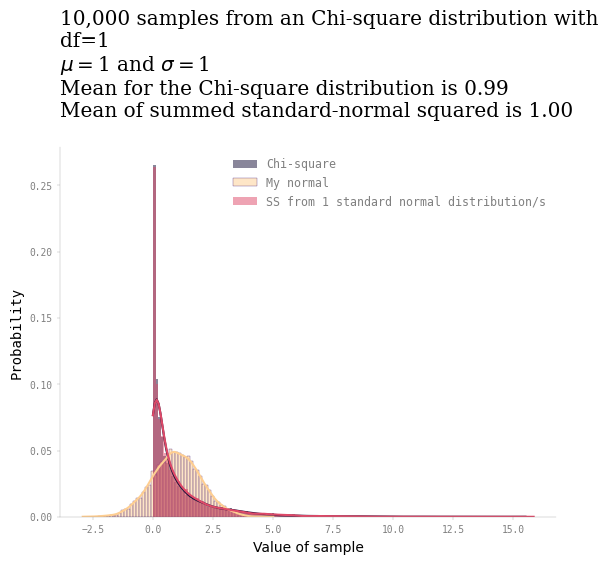

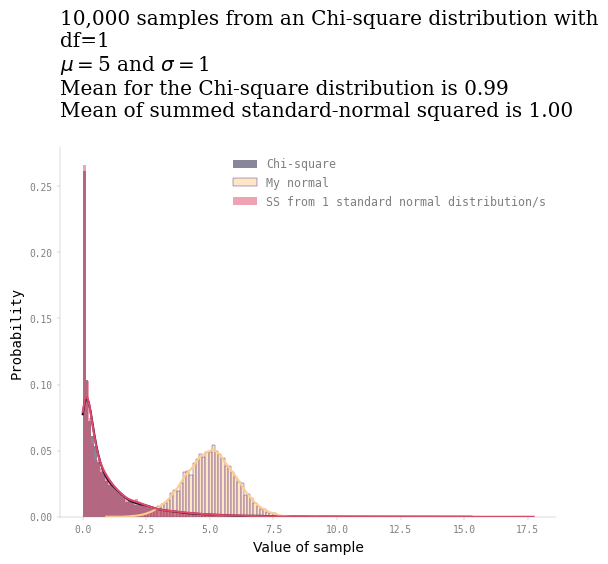

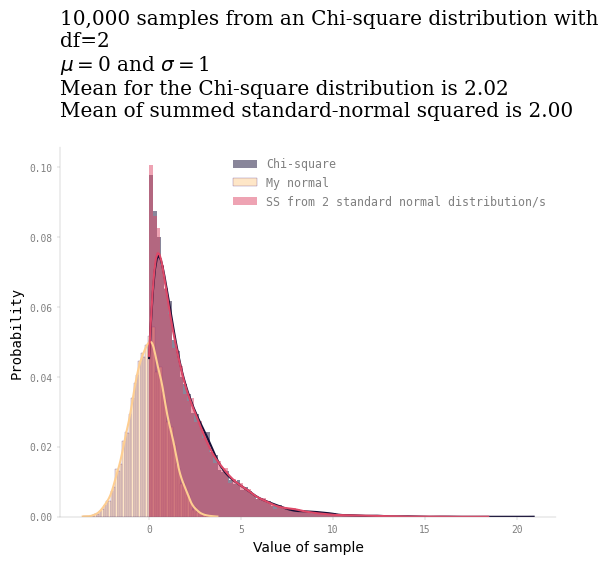

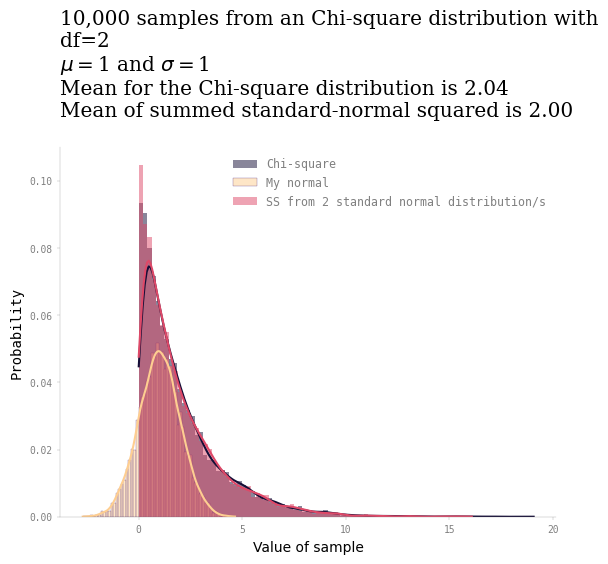

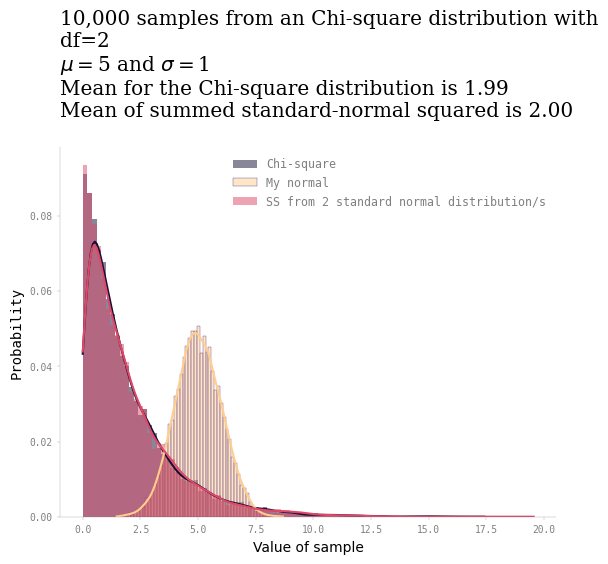

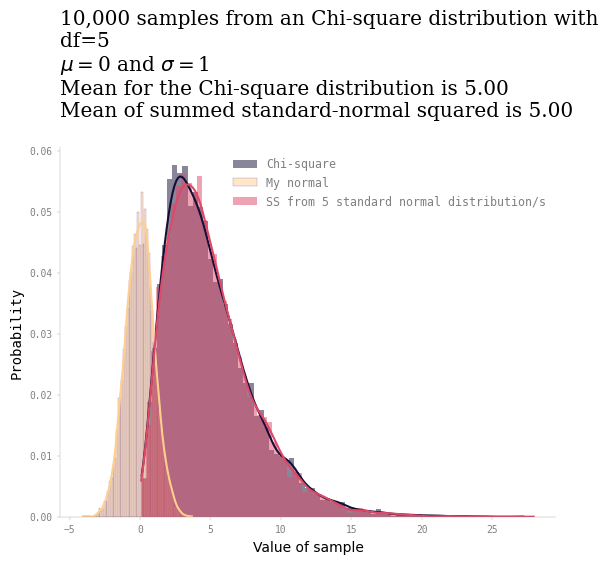

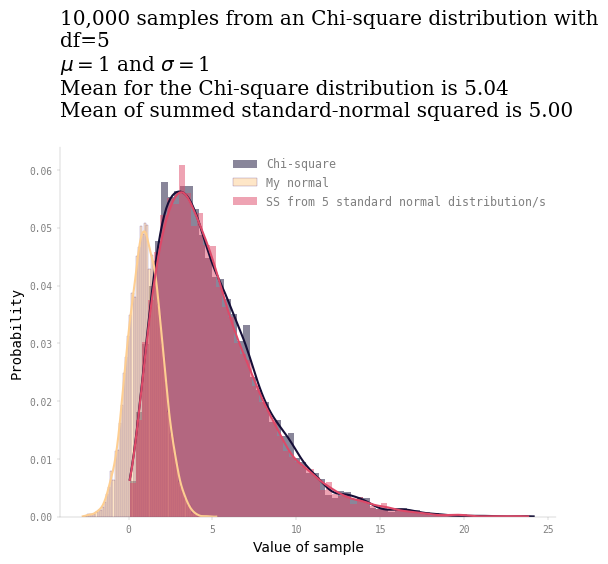

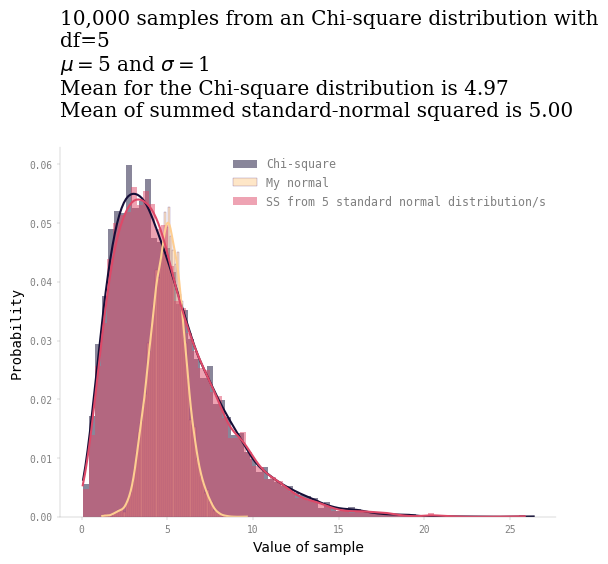

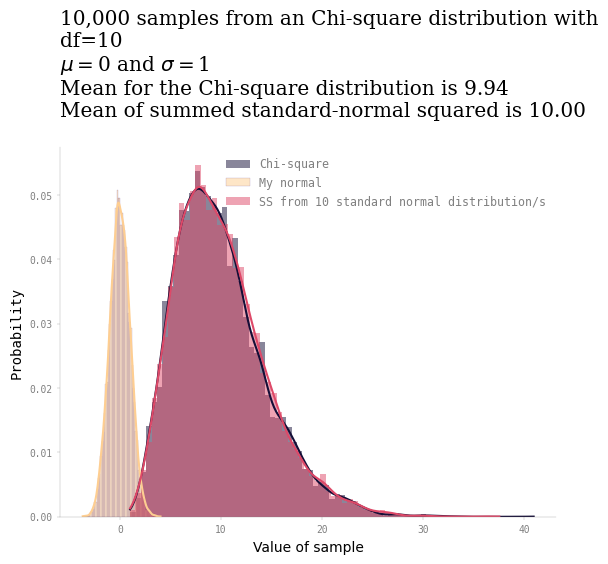

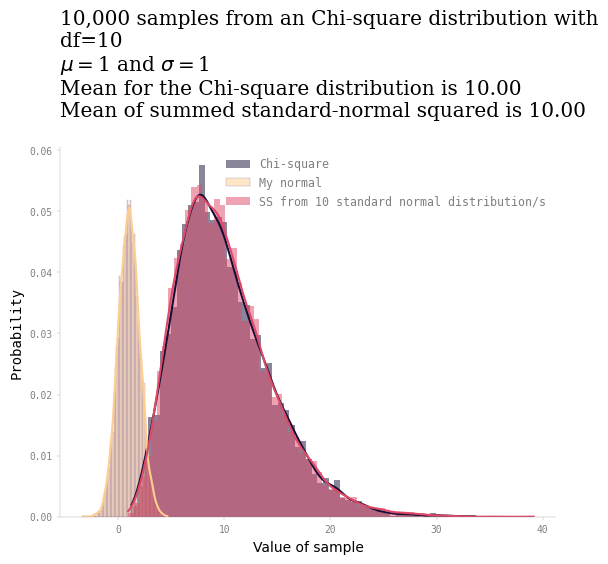

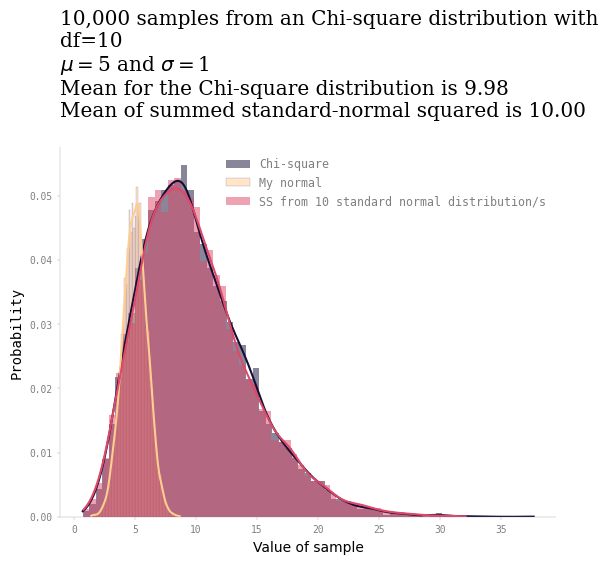

In [50]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger
from typing import Any

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )


def get_standard_normal_squared(
          loc: float = 0,
          scale: float = 1,
          size: int = 1_000
          ) -> Any:
      
    my_normal = np.random.normal(loc=loc, scale=scale, size=size)
    my_normal_mean = np.mean(my_normal)
    my_normal_std_dev = np.std(my_normal)
    my_standard_normal = (my_normal - my_normal_mean) / my_normal_std_dev
    my_summed_standard_normal_squared = np.square(my_standard_normal)
    return my_normal, my_summed_standard_normal_squared


def plot_chisquare(
    df: int = 1,
    size: int = 1_000,
    loc: float = 0,
    scale: float = 1,
    bw_adjust: float = 1
    ) -> None:

    my_chisquare = np.random.chisquare(df=df, size=size)

    my_summed_standard_normal_squared = np.repeat(0., size)

    ax=plt.subplots()[1] # type: ignore

    sns.histplot( # type: ignore
        my_chisquare,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        label='Chi-square',
        color=choose_my_color(0)
        )

    for df in [*range(1, df + 1)]:
        ith_my_normal, ith_my_summed_standard_normal_squared = get_standard_normal_squared(loc=loc, size=size)
        my_summed_standard_normal_squared = (
            my_summed_standard_normal_squared + ith_my_summed_standard_normal_squared
            )
        
        if df == 1:
            sns.histplot( # type: ignore
                ith_my_normal,
                ax=ax,
                stat='probability',
                kde=True,
                kde_kws={'bw_adjust' : bw_adjust},
                edgecolor=choose_my_color(~8),
                label=f'My normal',
                color=choose_my_color(8)
                )

    sns.histplot( # type: ignore
        my_summed_standard_normal_squared,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        label=f'SS from {df} standard normal distribution/s',
        color=choose_my_color(5)
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from an Chi-square distribution with\n'
        f'df={df:,}\n'
        fr'$\mu=${loc} and $\sigma=${scale}'
        '\n'
        f'Mean for the Chi-square distribution is {np.mean(my_chisquare):.2f}\n'
        'Mean of summed standard-normal squared is '
        f'{np.mean(my_summed_standard_normal_squared):.2f}\n',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
dfs_to_cycle_through = [1, 2, 5, 10]
locs_to_cycle_through = [0, 1, 5]

for df in dfs_to_cycle_through:
    for loc in locs_to_cycle_through:
        plot_chisquare(df=df, loc=loc, size=10_000)